In [ ]:
import tensorflow as tf
import numpy as np

# Part A


In [ ]:
"""
The conversion from tensor to numpy was interesting
"""
rank_1_tensor = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])
print(rank_1_tensor.numpy())
"""
this last element is really useful
"""
print("Last:", rank_1_tensor[-1].numpy())


"""
important to remember
"""
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]]
try:
  tensor = tf.constant(ragged_list)
except Exception as e:
  print(f"{type(e).__name__}: {e}")

[ 0  1  1  2  3  5  8 13 21 34]
Last: 34
ValueError: Can't convert non-rectangular Python sequence to Tensor.


# Part B


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions

**Import Data**

In [ ]:
import pandas as pd
oldFile='/content/drive/Shareddrives/Team 8- Neural Network/Assignment-4/Delta_testfile.csv'
newFile='/content/drive/Shareddrives/Team 8- Neural Network/Assignment-5/Diabetes_Data.csv'
df = pd.read_csv(newFile, header=None)
# df.tail()

**Parse Data**

In [ ]:
num_col=len(df.columns)
num_row=len(df)
num_feat=num_col-1
epochs = 1000
y=df.iloc[:num_row, num_col-1].values
X=df.iloc[:num_row, :num_col-1].values.astype(float) 


print(X)
# print(y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


**Models** 


In [ ]:
import tensorflow.keras
from tensorflow.keras import models, layers, optimizers

In [ ]:
# #Model 1  // This model uses three step activation functions layer and then a final sigmoid neuron layer. This model makes use of large hidden layers to let the neural network form new connections.
model1 = models.Sequential()
model1.add(layers.Dense(64, input_dim=8, activation='relu'))
model1.add(layers.Dense(32, activation='relu'))
model1.add(layers.Dense(16, activation='relu', use_bias=True))
model1.add(layers.Dense(1, kernel_initializer='random_uniform', activation='sigmoid', use_bias=True))
model1.compile(optimizer='SGD', loss='mse', metrics=['mse','accuracy'])
history1 = model1.fit(X, y, verbose = 0, epochs = epochs,batch_size=50,shuffle=False)

In [ ]:
#model.compile(optimizer=optimizers.SGD(lr=0.001), loss='mse', metrics=['mse','accuracy']) #another optimizer we can use

In [ ]:
#Model 2 // tanh activation function, tapers down.

model2 = models.Sequential()
model2.add(layers.Dense(8, input_dim=8, use_bias = False,activation='tanh')) 
model2.add(layers.Dense(6, use_bias = False,activation="tanh")) 
model2.add(layers.Dense(4, use_bias = False,activation="tanh")) 
model2.add(layers.Dense(2, use_bias = False,activation="tanh")) 
model2.add(layers.Dense(1, use_bias = True))
model2.compile(optimizer='SGD', loss='mse', metrics=['mse','accuracy'])
history2 = model2.fit(X, y, verbose = 0, epochs = epochs,batch_size=100,shuffle=True)

In [ ]:
#Model 3  // This model uses only one layer with tanh, and no hidden layers

model3 = models.Sequential()
model3.add(layers.Dense(8, input_dim=8, use_bias = False, activation='tanh')) 
model3.add(layers.Dense(1, use_bias = True))
model3.compile(optimizer='SGD', loss='mse', metrics=['mse','accuracy'])
history3 = model3.fit(X, y, verbose = 0, epochs = epochs,batch_size=100,shuffle=False)

In [ ]:
#Model 4  

model4 = models.Sequential()
#input layer
model4.add(layers.Dense(8, input_dim=8, use_bias = False)) 
#hidden layer
model4.add(layers.Dense(512, use_bias=False, activation='tanh')) 
model4.add(layers.Dense(64, use_bias=False, activation='tanh')) 
model4.add(layers.Dense(8, use_bias=False, activation='tanh')) 
#output layer
model4.add(layers.Dense(1, ))

model4.compile(optimizer='SGD', loss='mse', metrics=['mse','accuracy'])
history4 = model4.fit(X, y, verbose = 0, epochs = epochsuse_bias = True,batch_size=32,shuffle=False)

**Plot**

Model 4 is the best

Model 1
Average accuracy over the last 100 epochs:0.8104296845197677
Mean Squared Errors:


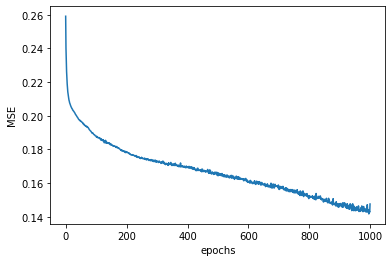

Accuracy:


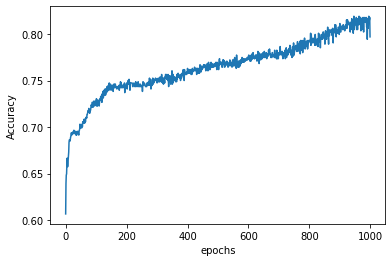

----end model----



Model 2
Average accuracy over the last 100 epochs:0.6683593726158142
Mean Squared Errors:


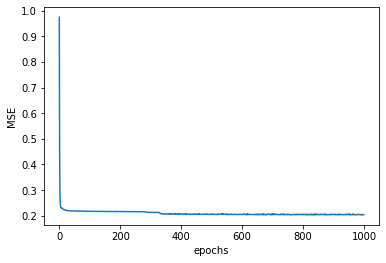

Accuracy:


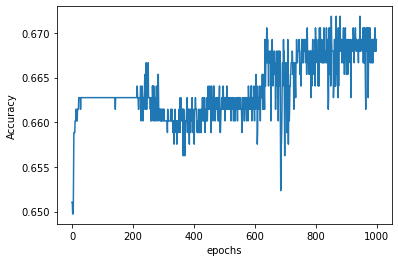

----end model----



Model 3
Average accuracy over the last 100 epochs:0.6595312595367432
Mean Squared Errors:


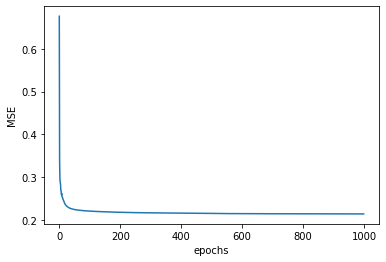

Accuracy:


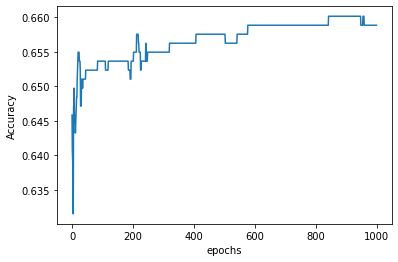

----end model----



Model 4
Average accuracy over the last 100 epochs:0.9908463537693024
Mean Squared Errors:


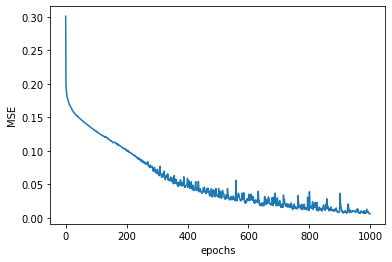

Accuracy:


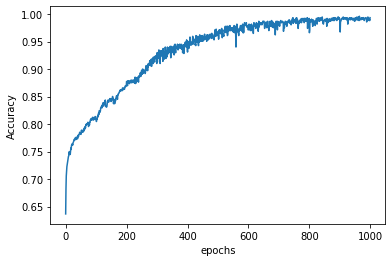

In [ ]:
print('\033[1m'+"Model 4 is the best"+'\033[0m' +"\n")

#model1 
print('\033[1m'+'\033[4m'+"Model 1"+'\033[0m')
AVG_ACCURACY = np.average((history1.history['accuracy'])[(epochs-100):])  #Metric for how well our architecture is equipped for this task.
print("Average accuracy over the last 100 epochs:" +'\033[4m'+ str(AVG_ACCURACY) +'\033[0m') 

print("Mean Squared Errors:")
plt.plot(history1.history['mse'])
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.show()

print("Accuracy:")
plt.plot(history1.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()
print("----end model----")
print("\n")
print()


#model2
print('\033[1m'+'\033[4m'+"Model 2"+'\033[0m')
AVG_ACCURACY = np.average((history2.history['accuracy'])[(epochs-100):])  #Metric for how well our architecture is equipped for this task.
print("Average accuracy over the last 100 epochs:" + '\033[4m'+str(AVG_ACCURACY) + '\033[0m')

print("Mean Squared Errors:")
plt.plot(history2.history['mse'])
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.show()
 
print("Accuracy:")
plt.plot(history2.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()
print("----end model----")
print("\n")
print()


#model3
print('\033[1m'+'\033[4m'+"Model 3"+'\033[0m')
AVG_ACCURACY = np.average((history3.history['accuracy'])[(epochs-100):])  #Metric for how well our architecture is equipped for this task.
print("Average accuracy over the last 100 epochs:" + '\033[4m'+ str(AVG_ACCURACY) + '\033[0m') 

print("Mean Squared Errors:")
plt.plot(history3.history['mse'])
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.show()

print("Accuracy:")
plt.plot(history3.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()
print("----end model----")
print("\n")
print()


#model4
print('\033[1m'+'\033[4m'+"Model 4"+'\033[0m')
AVG_ACCURACY = np.average((history4.history['accuracy'])[(epochs-100):])  #Metric for how well our architecture is equipped for this task.
print("Average accuracy over the last 100 epochs:" +'\033[4m'+ str(AVG_ACCURACY) + '\033[0m') 

print("Mean Squared Errors:")
plt.plot(history4.history['mse'])
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.show()

print("Accuracy:")
plt.plot(history4.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()